In [1]:
##### Також хотів би відмітити, що деякі product_category_name - пусті.
##### І також для одного значення, а саме pc_gamer, відсутні дані у product_category_name_english
##### всього таких випадків 613
import pandas as pd
import matplotlib.pyplot as plt

products_df = pd.read_csv("../data/products.csv")
translations_df = pd.read_csv("../data/product_category_name_translation.csv")

merged_df = pd.merge(products_df, translations_df, how='left', on='product_category_name')

merged_df = merged_df[['product_id', 'product_category_name', 'product_category_name_english']]

merged_df.head()

,product_id,product_category_name,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,housewares


In [2]:
order_items_df = pd.read_csv('../data/order_items.csv')
merged_df = pd.merge(order_items_df, merged_df, on='product_id', how='left')

columns_to_drop = ['shipping_limit_date', 'freight_value', 'price', 'order_item_id', 'seller_id']
merged_df.drop(columns=columns_to_drop, inplace=True)

merged_df.drop_duplicates(subset=['order_id', 'product_id'], keep='first', inplace=True)
print(len(merged_df['order_id']))
merged_df.head()

102425


,order_id,product_id,product_category_name,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,pet_shop,pet_shop
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,moveis_decoracao,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,perfumaria,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,ferramentas_jardim,garden_tools


In [3]:
order_reviews_df = pd.read_csv('../data/order_reviews.csv')

merged_df = pd.merge(merged_df, order_reviews_df, on='order_id', how='left')

merged_df = merged_df[['order_id', 'product_id', 'product_category_name', 'product_category_name_english', 'review_score']]

merged_df.head()

,order_id,product_id,product_category_name,product_category_name_english,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,cool_stuff,5
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,pet_shop,pet_shop,4
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,moveis_decoracao,furniture_decor,5
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,perfumaria,perfumery,4
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,ferramentas_jardim,garden_tools,5


In [5]:
grouped_reviews = merged_df.groupby('product_id')['review_score'].value_counts().unstack().fillna(0)

grouped_reviews['positive_counter'] = grouped_reviews[[3, 4, 5]].sum(axis=1)
grouped_reviews['negative_counter'] = grouped_reviews[[1, 2]].sum(axis=1)

# Створення rating_products_df
rating_products_df = pd.DataFrame({
    'product_id': grouped_reviews.index,
    'positive_counter': grouped_reviews['positive_counter'].values,
    'negative_counter': grouped_reviews['negative_counter'].values,
    'rating': grouped_reviews['positive_counter'] - grouped_reviews['negative_counter']
})

rating_products_df = rating_products_df.sort_values(by='rating', ascending=True).reset_index(drop=True)

file_path = 'new_data_task3/rating_products.csv'
rating_products_df.to_csv(file_path, index=False)

rating_products_df.head()

,product_id,positive_counter,negative_counter,rating
0,b1d207586fca400a2370d50a9ba1da98,12.0,31.0,-19.0
1,cd46a885543f0e169a49f1eb25c04e43,5.0,23.0,-18.0
2,89b121bee266dcd25688a1ba72eefb61,23.0,39.0,-16.0
3,c230b471b7e21ff9060e68ee154afd70,0.0,11.0,-11.0
4,fd0065af7f09af4b82a0ca8f3eed1852,1.0,10.0,-9.0


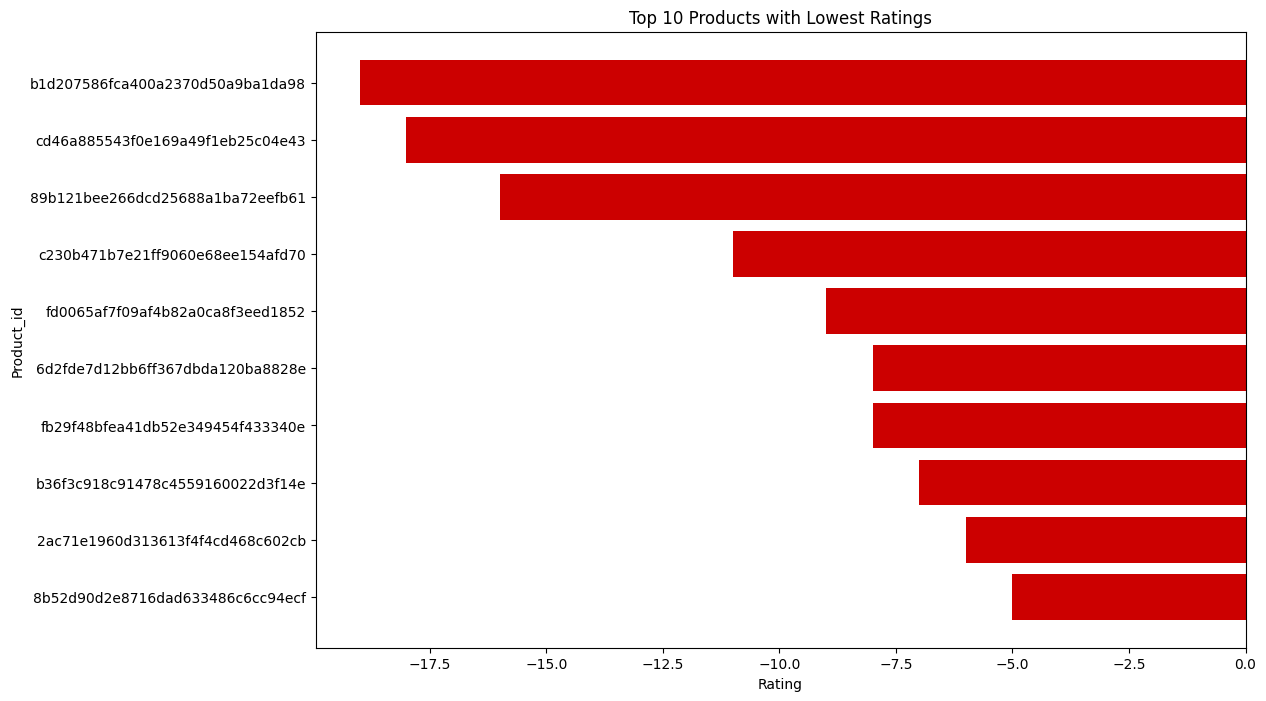

In [6]:
sorted_df = rating_products_df.sort_values(by='rating')

top_10_lowest_ratings = sorted_df.head(10)

plt.figure(figsize=(12, 8))
plt.barh(top_10_lowest_ratings['product_id'], top_10_lowest_ratings['rating'], color='#CC0000')
plt.xlabel('Rating')
plt.ylabel('Product_id')

plt.yticks(fontsize=10)  
plt.gca().invert_yaxis()

plt.title('Top 10 Products with Lowest Ratings')

plt.savefig('new_data_task3/Top_10_Products_with_Lowest_Ratings.png', bbox_inches='tight')
plt.show()

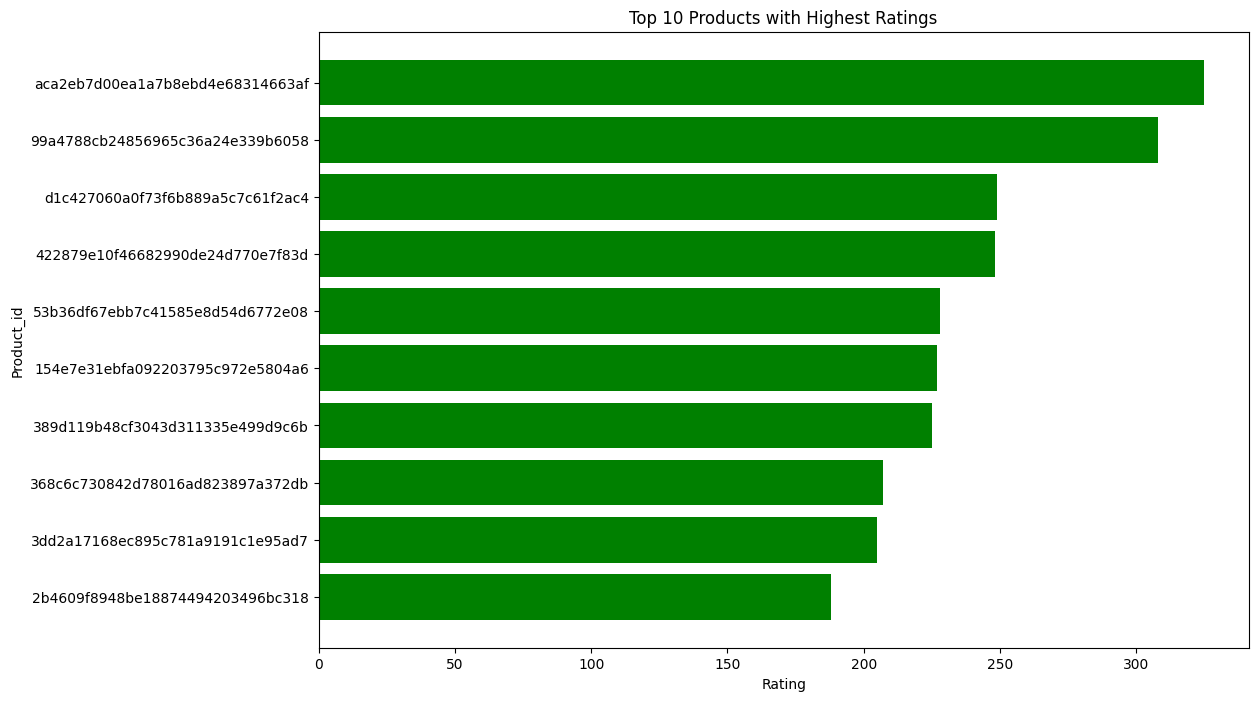

In [8]:
sorted_df = rating_products_df.sort_values(by='rating', ascending=False)

top_10_highest_ratings = sorted_df.head(10)

plt.figure(figsize=(12, 8))
plt.barh(top_10_highest_ratings['product_id'], top_10_highest_ratings['rating'], color='green')
plt.xlabel('Rating')
plt.ylabel('Product_id')

plt.yticks(fontsize=10)  
plt.gca().invert_yaxis()

plt.title('Top 10 Products with Highest Ratings')

plt.savefig('new_data_task3/Top_10_Products_with_Highest_Ratings.png', bbox_inches='tight')
plt.show()

In [13]:
grouped_reviews = merged_df.groupby('product_category_name_english')['review_score'].value_counts().unstack().fillna(0)

grouped_reviews['positive_counter'] = grouped_reviews[[3, 4, 5]].sum(axis=1)
grouped_reviews['negative_counter'] = grouped_reviews[[1, 2]].sum(axis=1)

# Створення rating_products_df
rating_category_products_df = pd.DataFrame({
    'product_category_name_english': grouped_reviews.index,
    'positive_counter': grouped_reviews['positive_counter'].values,
    'negative_counter': grouped_reviews['negative_counter'].values,
    'rating': grouped_reviews['positive_counter'] - grouped_reviews['negative_counter']
})

rating_category_products_df = rating_category_products_df.sort_values(by='rating', ascending=True).reset_index(drop=True)

rating_category_products_df.head()

,product_category_name_english,positive_counter,negative_counter,rating
0,security_and_services,1.0,1.0,0.0
1,fashion_childrens_clothes,7.0,1.0,6.0
2,la_cuisine,10.0,3.0,7.0
3,home_comfort_2,18.0,6.0,12.0
4,cds_dvds_musicals,12.0,0.0,12.0


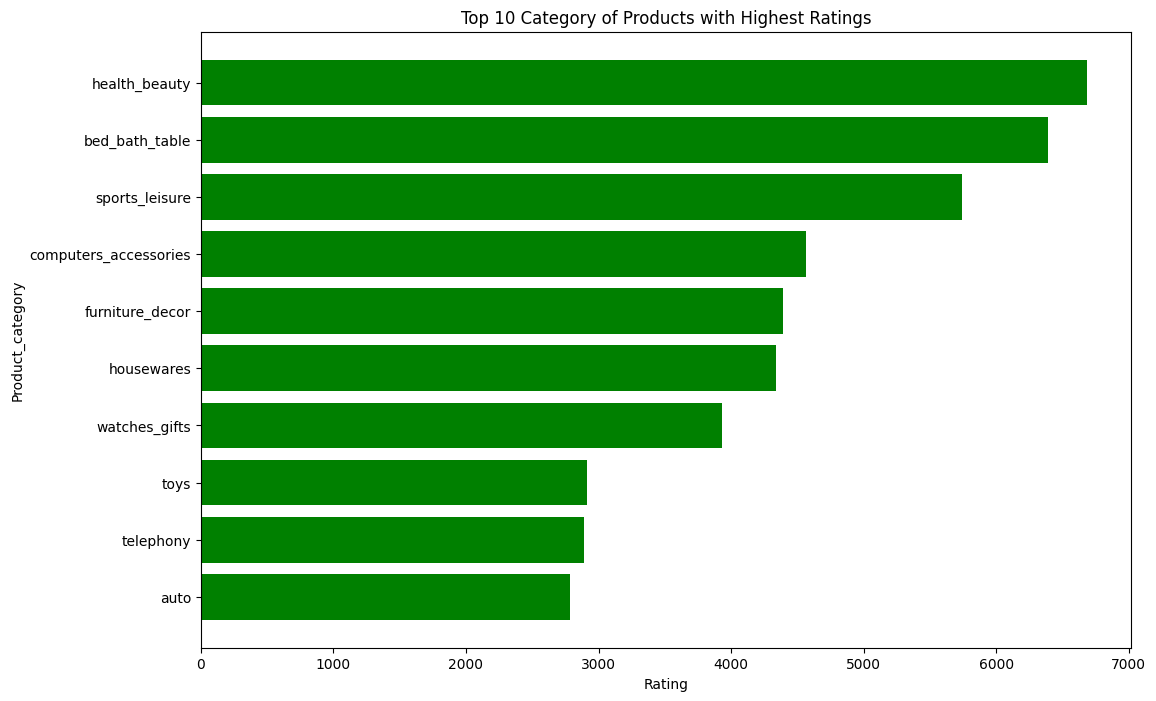

In [14]:
sorted_rating_category_products_df = rating_category_products_df.sort_values(by='rating', ascending=False).reset_index(drop=True)

top_10_highest_ratings = sorted_rating_category_products_df.head(10)

plt.figure(figsize=(12, 8))
plt.barh(top_10_highest_ratings['product_category_name_english'], top_10_highest_ratings['rating'], color='green')
plt.xlabel('Rating')
plt.ylabel('Product_category')

plt.yticks(fontsize=10)  
plt.gca().invert_yaxis()

plt.title('Top 10 Category of Products with Highest Ratings')

plt.savefig('new_data_task3/Top_10_Category_Products_with_Highest_Ratings.png', bbox_inches='tight')
plt.show()

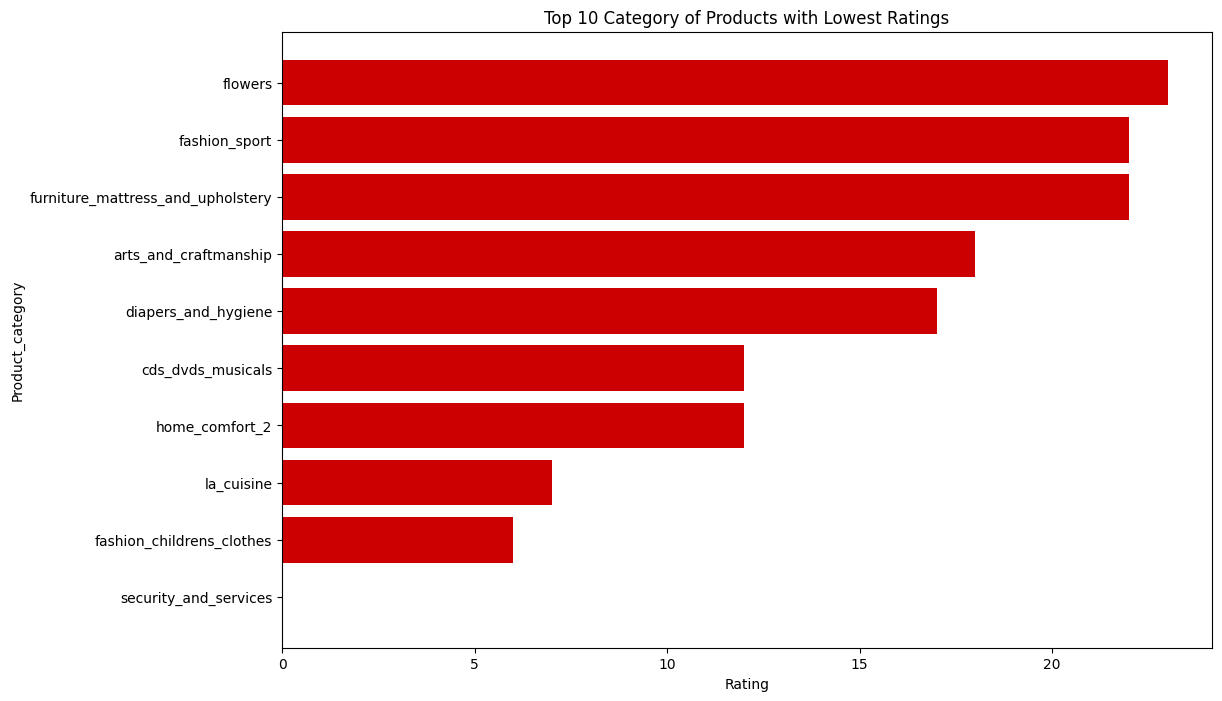

In [15]:
sorted_rating_category_products_df = rating_category_products_df.sort_values(by='rating', ascending=True).reset_index(drop=True)

top_10_lowest_ratings = sorted_rating_category_products_df.head(10)

plt.figure(figsize=(12, 8))
plt.barh(top_10_lowest_ratings['product_category_name_english'], top_10_lowest_ratings['rating'], color='#CC0000')
plt.xlabel('Rating')
plt.ylabel('Product_category')

plt.yticks(fontsize=10)  

plt.title('Top 10 Category of Products with Lowest Ratings')

plt.savefig('new_data_task3/Top_10_Category_Products_with_Lowest_Ratings.png', bbox_inches='tight')
plt.show()